# EDA Flights Dataset

In [1]:
# Packages
#install.packages("psych")
library(psych)
library(ggplot2)
#install.packages('ggpubr')
library(ggpubr)
library(dplyr)
#install.packages('reshape')
library(reshape)
library(ggrepel)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename




# Airlines Analysis

## Rate and Punctuality X Number of Flights (FIG 8)

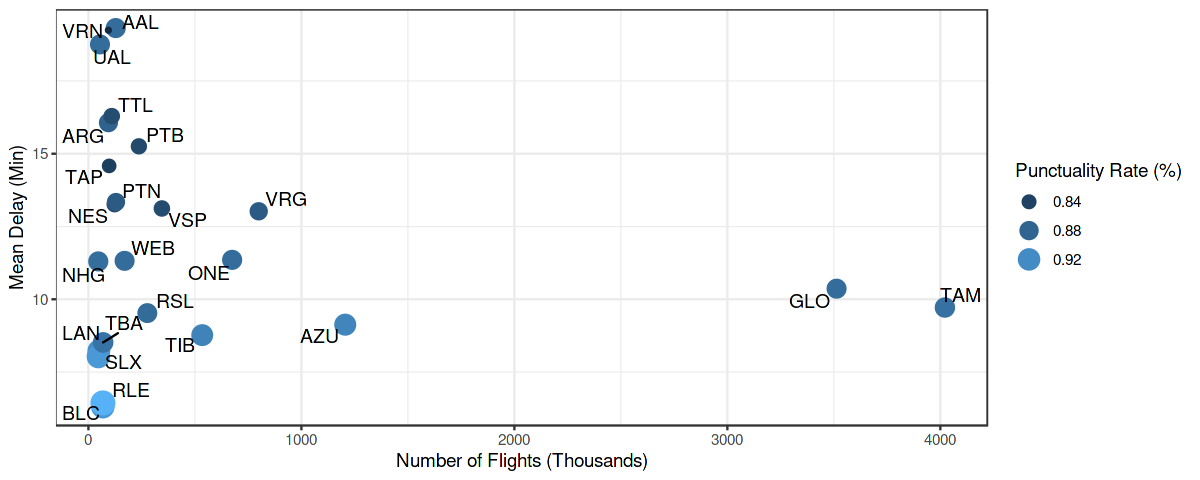

In [2]:
dsAtd = read.csv('graphData/puncRateXnFlights.csv')
options(repr.plot.width = 10, repr.plot.height = 4)

atpPlot = ggplot(dsAtd, aes(x=n/1000, y=rate, label=airline, size=punc, color=punc)) + 
    theme_bw() +
    xlab('Number of Flights (Thousands)') + 
    ylab('Mean Delay (Min)') + 
    geom_point() +
    geom_text_repel(size=4, color='black') +
    guides(size=guide_legend(title="Punctuality Rate (%)"),
           color=guide_legend(title="Punctuality Rate (%)"))
    

fig = ggarrange(atpPlot, #,# atcPlot, atpPlot, 
              ncol = 1, nrow = 1)

fig

## Stacked Number of Flights by Airlines

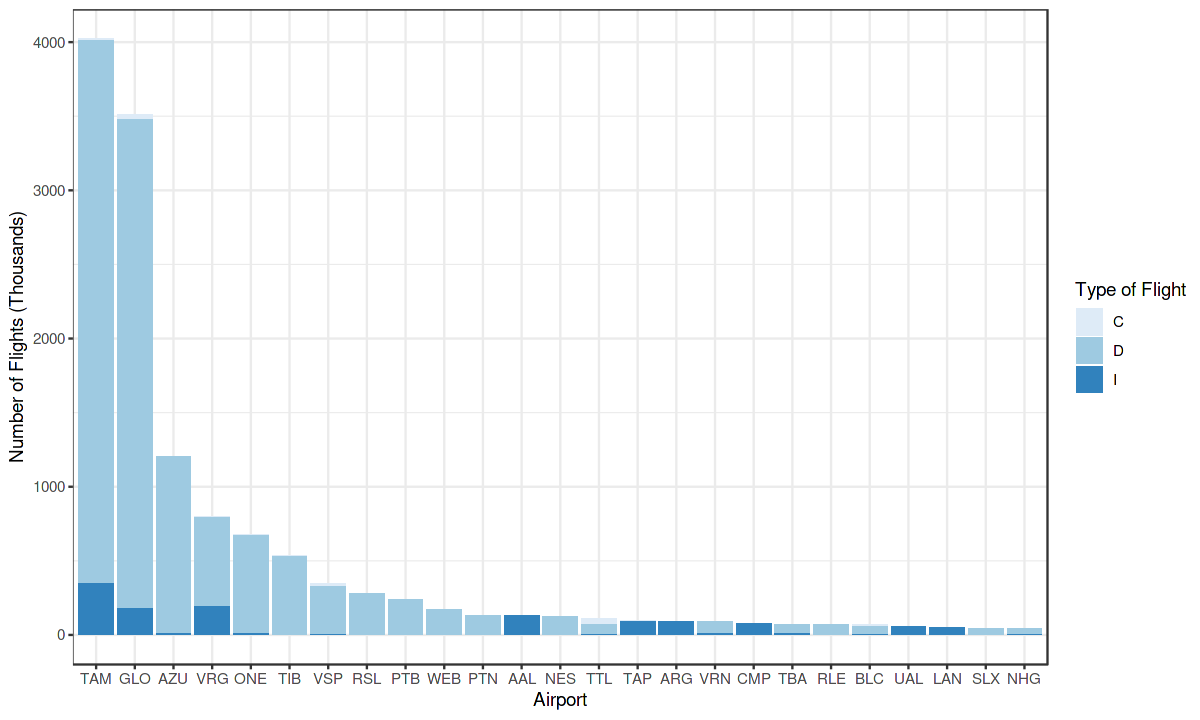

In [3]:
dsNstAirline = read.csv('graphData/airlineXnFlights.csv')

options(repr.plot.width = 10, repr.plot.height = 6)

aptsNFlights <- ggplot(data=dsNstAirline, aes(x=reorder(airline_icao, -totalAirline), y=n/1000)) +
    geom_col(aes(fill=flight_type)) + 
    xlab('Airport') + 
    ylab('Number of Flights (Thousands)') + 
    theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14, face="bold")) +
    guides(fill=guide_legend(title="Type of Flight")) +
    scale_fill_brewer(palette="Blues") +
    theme_bw()
aptsNFlights

# Airport Analysis (FIG 3)

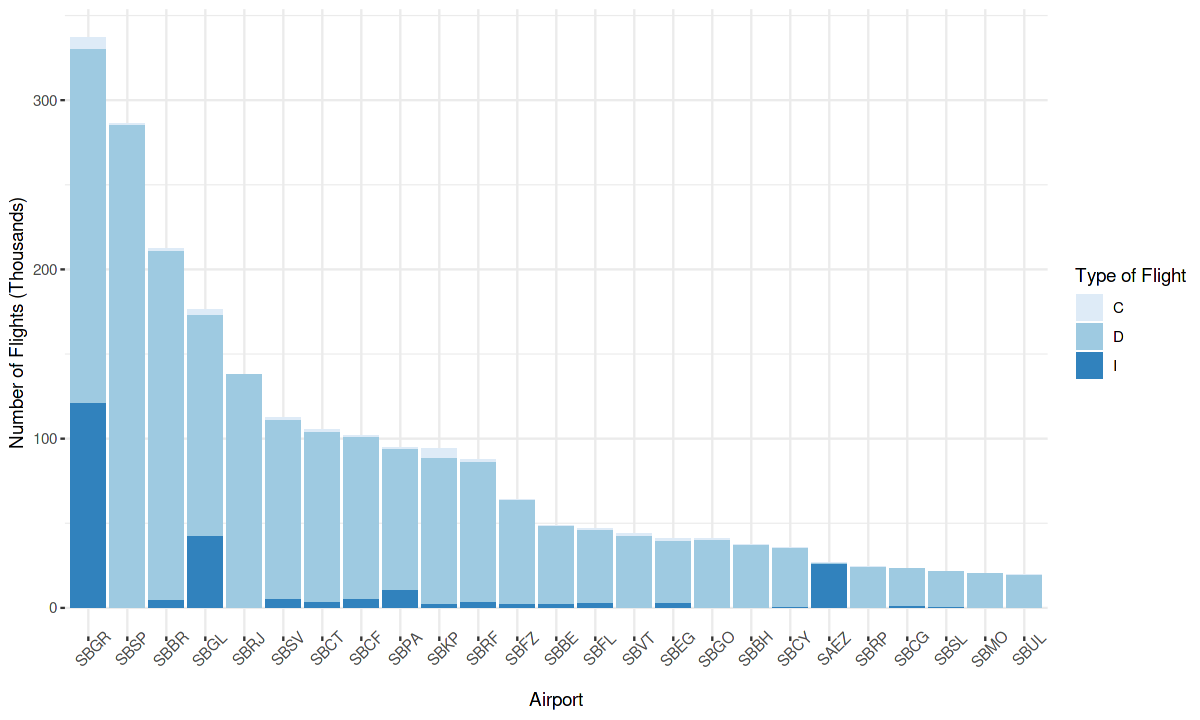

In [4]:
dsNstArpts = read.csv('graphData/airportsXnFlights.csv')

options(repr.plot.width = 10, repr.plot.height = 6)

aptsNFlights <- ggplot(data=dsNstArpts, aes(x=reorder(origin_icao, -totalArpts/1000), y=total/1000)) +
    geom_col(aes(fill=flight_type)) + 
    xlab('Airport') + 
    ylab('Number of Flights (Thousands)') + 
    theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14, face="bold")) +
    guides(fill=guide_legend(title="Type of Flight")) +
    scale_fill_brewer(palette="Blues") +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 45, size=9), panel.border = element_blank())

aptsNFlights

## Rate and Punctuality x Number of Flights (FIG 4)

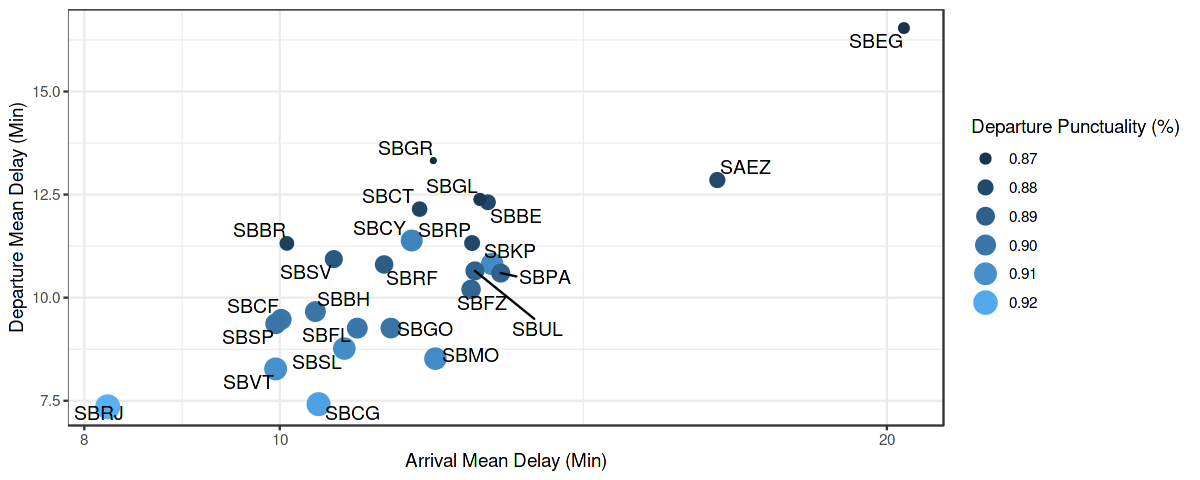

In [5]:
dsDlydOr = read.csv('graphData/puncRateXnFlights (origin).csv')
dsDlyaDs = read.csv('graphData/puncRateXnFlights (departure).csv')
dsDlyd = merge(dsDlydOr[, c('origin_icao', 'mean', 'punc')], dsDlyaDs[, c('destination_icao', 'mean', 'punc')], by.x='origin_icao', by.y='destination_icao')

options(repr.plot.width = 10, repr.plot.height = 4)

apPlot = ggplot(dsDlyd, aes(x=mean.y, y=mean.x, label=origin_icao, size=punc.x, color=punc.x)) + 
    theme_bw() +
    scale_x_continuous(trans='log10') +
    xlab('Arrival Mean Delay (Min)') + 
    ylab('Departure Mean Delay (Min)') + 
    geom_point() +
    geom_text_repel(size=4, color='black')+
    guides(size=guide_legend(title="Departure Punctuality (%)"),
           color=guide_legend(title="Departure Punctuality (%)"))

fig = ggarrange(apPlot, #,# atcPlot, atpPlot, 
              ncol = 1, nrow = 1)

fig

# Day Period (FIG 5)

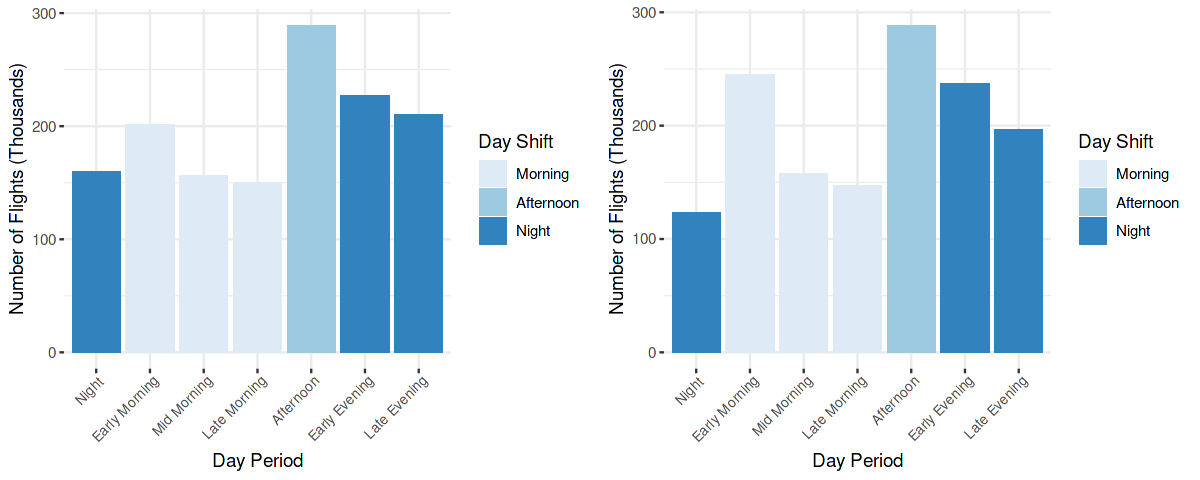

In [6]:
dsNDayPeriodOr = read.csv('graphData/dayPeriodXnFlights (origin).csv')
dsNDayPeriodDs = read.csv('graphData/dayPeriodXnFlights (destination).csv')

dsNDayPeriodOr$ds_arrival_day_period = factor(dsNDayPeriodOr$ds_arrival_day_period, levels=c('Night', 
                                                     'Early Morning',
                                                     'Mid Morning',
                                                     'Late Morning',
                                                     'Afternoon',
                                                     'Early Evening',
                                                     'Late Evening'))
dsNDayPeriodDs$ds_depart_day_period = factor(dsNDayPeriodDs$ds_depart_day_period, levels=c('Night', 
                                                     'Early Morning',
                                                     'Mid Morning',
                                                     'Late Morning',
                                                     'Afternoon',
                                                     'Early Evening',
                                                     'Late Evening'))

dsNDayPeriodOr$ds_day_shift = factor(dsNDayPeriodOr$ds_day_shift, levels=c('Morning',
                                             'Afternoon',
                                             'Night'))
dsNDayPeriodDs$ds_day_shift = factor(dsNDayPeriodDs$ds_day_shift, levels=c('Morning',
                                              'Afternoon',
                                              'Night'))

options(repr.plot.width = 10, repr.plot.height = 4)

aptsNDayPeriodDs <- ggplot(data=dsNDayPeriodDs, aes(x=ds_depart_day_period, y=n/1000, fill=ds_day_shift)) +
    geom_bar(stat="identity") + 
    xlab('Day Period') + 
    ylab('Number of Flights (Thousands)') + 
    theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14, face="bold")) +
    scale_fill_brewer(palette="Blues") +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 45, size=8, hjust=0.95), panel.border = element_blank()) +
    guides(fill=guide_legend(title="Day Shift"))
aptsNDayPeriodOr <- ggplot(data=dsNDayPeriodOr, aes(x=ds_arrival_day_period, y=n/1000, fill=ds_day_shift)) +
    geom_bar(stat="identity") + 
    xlab('Day Period') + 
    ylab('Number of Flights (Thousands)') + 
    theme(axis.text=element_text(size=12),
    axis.title=element_text(size=14, face="bold")) +
    scale_fill_brewer(palette="Blues") +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 45, size=8, hjust=0.95), panel.border = element_blank()) +
    guides(fill=guide_legend(title="Day Shift"))

fig2 = ggarrange(aptsNDayPeriodOr, aptsNDayPeriodDs,
                 ncol = 2, nrow = 1)

fig2

# Delay time series

# Delay probability by year (FIG 6)

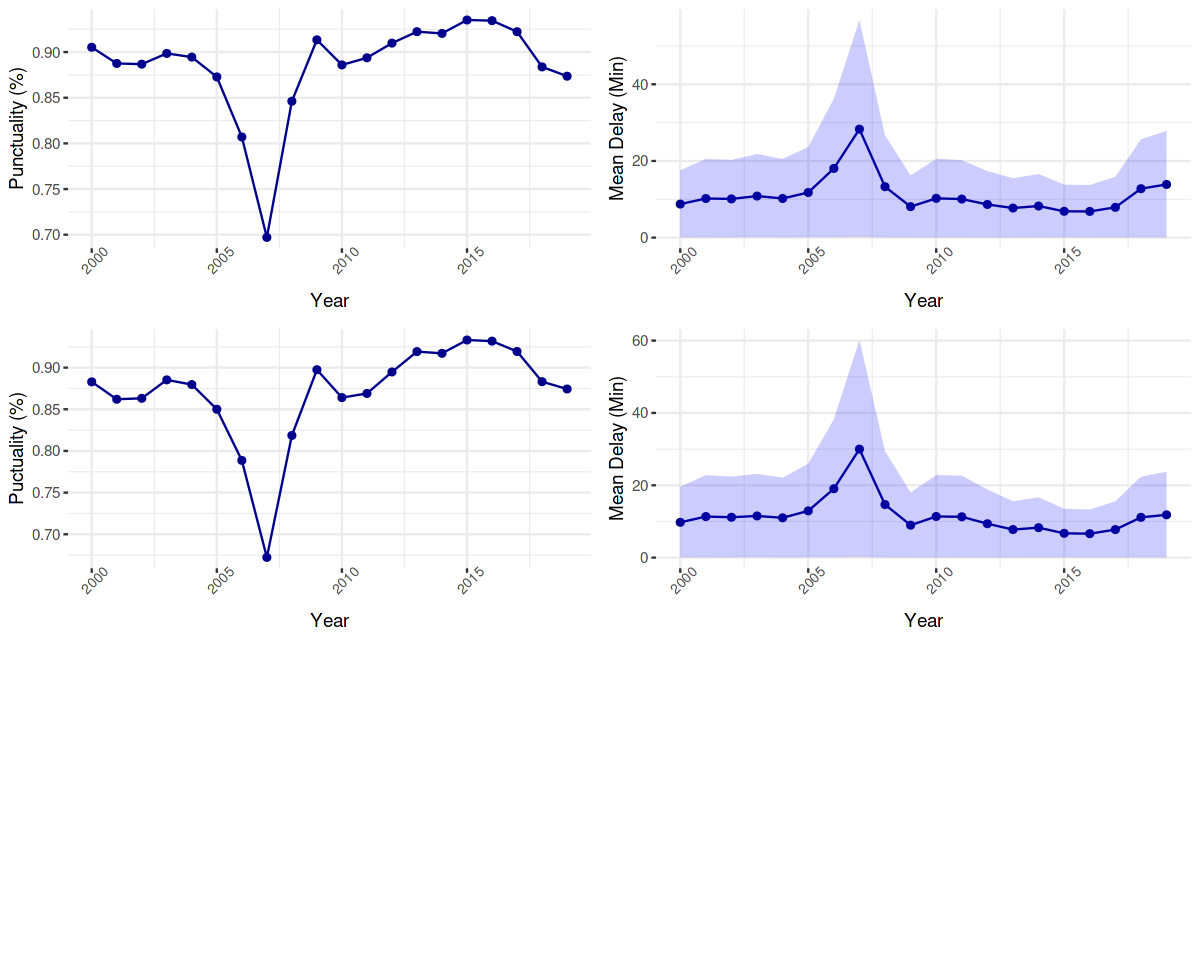

In [7]:
dsAtaYB = read.csv('graphData/puncXyear(arrival).csv')
dsAtdYB = read.csv('graphData/puncXyear(departure).csv')
dsAtaY = read.csv('graphData/rateXyear(arrival).csv')
dsAtdY = read.csv('graphData/rateXyear(departure).csv')

options(repr.plot.width = 10, repr.plot.height = 8)

atcBPlot = ggplot(dsAtaYB[dsAtaYB$year != 2020,], aes(x=year, y=1-mean, group=1)) + 
    geom_line(color='darkblue') +
    geom_point(color='darkblue') +
    xlab('Year') + 
    ylab('Punctuality (%)') +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 45, size=8), panel.border = element_blank())
atcPlot = ggplot(dsAtaY[dsAtaY$year != 2020,], aes(x=year, y=mean, group=1)) + 
    geom_line(color='darkblue') +
    geom_point(color='darkblue') +
    xlab('Year') + 
    ylab('Mean Delay (Min)') +
    geom_ribbon(aes(ymin = mean - lLimit,
                    ymax = mean + hLimit), alpha = 0.2, fill='blue') +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 45, size=8), panel.border = element_blank())
atpBPlot = ggplot(dsAtdYB[dsAtdYB$year != 2020,], aes(x=year, y=1-mean, group=1)) + 
    geom_line(color='darkblue') +
    geom_point(color='darkblue') +
    xlab('Year') + 
    ylab('Puctuality (%)') +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 45, size=8), panel.border = element_blank())
atpPlot = ggplot(dsAtdY[dsAtdY$year != 2020,], aes(x=year, y=mean, group=1)) + 
    geom_line(color='darkblue') +
    geom_point(color='darkblue') +
    xlab('Year') + 
    ylab('Mean Delay (Min)') +
    geom_ribbon(aes(ymin = mean - lLimit,
                    ymax = mean + hLimit), alpha = 0.2, fill='blue') +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 45, size=8), panel.border = element_blank())  

fig = ggarrange(atcBPlot, atcPlot,  atpBPlot, atpPlot, 
              ncol = 2, nrow = 3)
fig

## Delay probability by month (FIG 7)

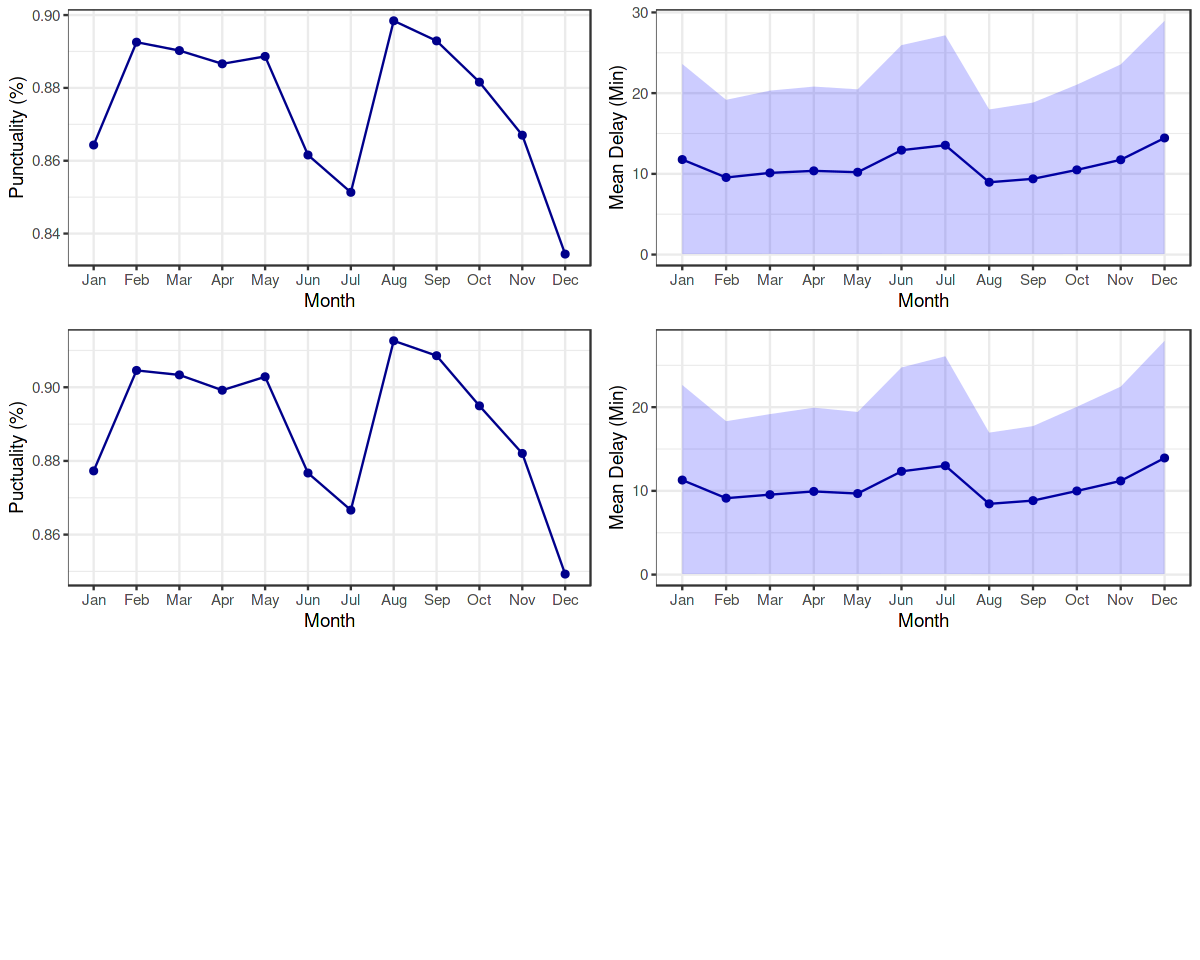

In [8]:
dsMthA = read.csv('graphData/rateXmonth(arrival).csv')
dsMthD = read.csv('graphData/rateXmonth(departure).csv')

monthsLevels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

atcBPlot = ggplot(dsMthA, aes(x=factor(monthAbb, levels=monthsLevels), y=1-punc, group=1)) + 
    geom_line(color='darkblue') +
    geom_point(color='darkblue') +
    xlab('Month') + 
    ylab('Punctuality (%)') +
    theme(axis.text.x = element_text(angle = 45, size=12), axis.text.y = element_text(size=15)) +
    theme_bw()
atcPlot = ggplot(dsMthA, aes(x=factor(monthAbb, levels=monthsLevels), y=mean, group=1)) + 
    geom_line(color='darkblue') +
    geom_point(color='darkblue') +
    xlab('Month') + 
    ylab('Mean Delay (Min)') +
    geom_ribbon(aes(ymin = mean - lLimit,
                    ymax = mean + hLimit), alpha = 0.2, fill='blue') +
    theme(axis.text.x = element_text(angle = 45, size=12), axis.text.y = element_text(size=15)) +
    theme_bw()
atpBPlot = ggplot(dsMthD, aes(x=factor(monthAbb, levels=monthsLevels), y=1-punc, group=1)) + 
    geom_line(color='darkblue') +
    geom_point(color='darkblue') +
    xlab('Month') + 
    ylab('Puctuality (%)') +
    theme(axis.text.x = element_text(angle = 45, size=12), axis.text.y = element_text(size=15)) +
    theme_bw()
atpPlot = ggplot(dsMthD, aes(x=factor(monthAbb, levels=monthsLevels), y=mean, group=1)) + 
    geom_line(color='darkblue') +
    geom_point(color='darkblue') +
    xlab('Month') + 
    ylab('Mean Delay (Min)') +
    geom_ribbon(aes(ymin = mean - lLimit,
                    ymax = mean + hLimit), alpha = 0.2, fill='blue') +
    theme(axis.text.x = element_text(angle = 45, size=12), axis.text.y = element_text(size=15)) +
    theme_bw()

fig = ggarrange(atcBPlot, atcPlot,  atpBPlot, atpPlot, 
              ncol = 2, nrow = 3)

fig